In [66]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import matplotlib.image as mpimg

In [67]:
# == parameters ==
run_number = "222753"
raw_data_dir = "/xustrg0/2024B8049/"
processed_data_dir = "/UserData/fperakis/test_data_2025/processed"


In [68]:
# == Load data == 
file_path = processed_data_dir + f"/Iq_{run_number}_combined.h5"  
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Combined file not found at: {file_path}")

with h5py.File(file_path, "r") as f:
    I = f["I"][:]
    q = f["q"][:]
    phi = f["phi"][:]
    result_log = f.attrs.get("result_log", "No log info available")

print("Data loaded:")
print(f"I shape: {I.shape}")
print(f"q shape: {q.shape}, phi shape: {phi.shape}")
print(f"Result log: {result_log}")


Data loaded:
I shape: (5999, 72, 150)
q shape: (150,), phi shape: (72,)
Result log: No log info available


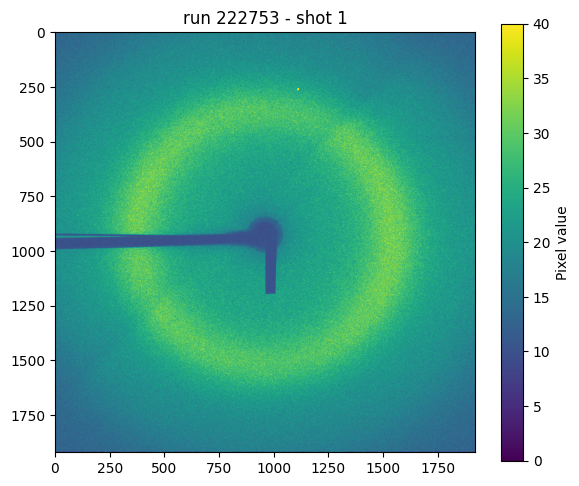

In [69]:
# == Load and plot one shot from raw data
shot=1
raw_path = raw_data_dir+f"{run_number}/data_{shot:06}.img"
raw_image=mpimg.imread(raw_path)

plt.figure(figsize=(6, 5))
plt.imshow(raw_image, vmax = 40)
plt.colorbar(label="Pixel value")
plt.title(r"run %i - shot %i"%(int(run_number), shot))
plt.tight_layout()
plt.show()

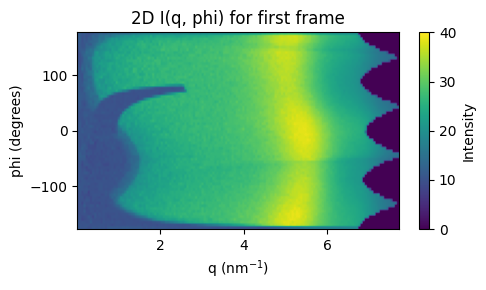

In [70]:
# == Plot I(q,phi) (e.g., the first one)
shot=1
plt.figure(figsize=(5, 3))
plt.imshow(I[shot], extent=(q[0], q[-1], phi[0], phi[-1]), aspect="auto", origin="lower", vmax=40)
plt.colorbar(label="Intensity")
plt.xlabel("q (nm$^{-1}$)")
plt.ylabel("phi (degrees)")
plt.title("2D I(q, phi) for first frame")
plt.tight_layout()
plt.show()

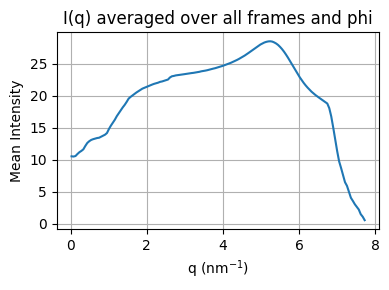

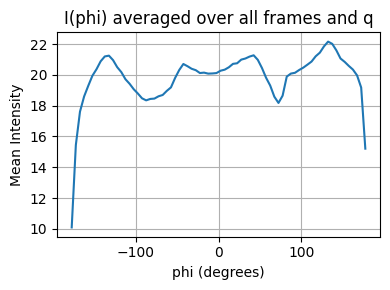

In [71]:
# Mean I(q) over all shots and phi
I_mean_q = np.mean(I, axis=(0, 1))

# Mean I(phi) over all shots and q
I_mean_phi = np.mean(I, axis=(0, 2))

# Plot I(q)
plt.figure(figsize=(4, 3))
plt.plot(q, I_mean_q)
plt.xlabel("q (nm$^{-1}$)")
plt.ylabel("Mean Intensity")
plt.title("I(q) averaged over all frames and phi")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot I(phi)
plt.figure(figsize=(4, 3))
plt.plot(phi, I_mean_phi)
plt.xlabel("phi (degrees)")
plt.ylabel("Mean Intensity")
plt.title("I(phi) averaged over all frames and q")
plt.grid(True)
plt.tight_layout()
plt.show()


